In [704]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from tqdm import tqdm

In [705]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [706]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)


In [707]:
image, label = train_data[0]
image, image.shape, label 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [708]:
classes = train_data.classes

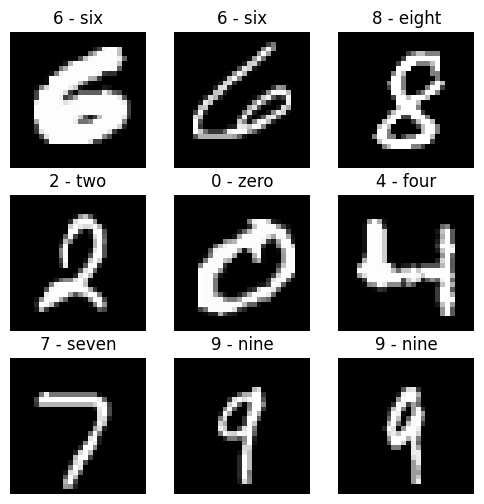

In [709]:
torch.manual_seed(42)

fig = plt.figure(figsize=(6, 6))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(classes[label])
    plt.axis(False);

In [710]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [711]:
print(f'Train data: {train_dataloader.__len__()} batches of {BATCH_SIZE}\n{train_dataloader.dataset}')

Train data: 1875 batches of 32
Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [712]:
CONV_KERNEL_SIZE = 3
PADDING = 0
POOL_KERNEL_SIZE = 2

class CNN_Model(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=CONV_KERNEL_SIZE
            ),
            nn.ReLU()
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=CONV_KERNEL_SIZE
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=POOL_KERNEL_SIZE
            )
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=CONV_KERNEL_SIZE
            ),
            nn.ReLU()
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=CONV_KERNEL_SIZE
            ),
            nn.ReLU(),
            nn.MaxPool2d(
                kernel_size=POOL_KERNEL_SIZE
            )
        )
        self.block5 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=160, 
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.block1(x)
        # print(x.shape)
        x = self.block2(x)
        # print(x.shape)
        x = self.block3(x)
        # print(x.shape)
        x = self.block4(x)
        # print(x.shape)
        x = self.block5(x)
        # print(x.shape)
        return x

In [713]:
model = CNN_Model(
    input_shape=1,
    hidden_units=10,
    output_shape=len(classes)
    )
model

CNN_Model(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block5): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [714]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [715]:
def accuracy_fn(y_pred, y_target):
    correct = torch.eq(y_pred, y_target).sum().item()

    return (correct/len(y_pred))*100

In [716]:
def train_step(
        model: torch.nn.Module, 
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        device: torch.device):
    train_loss, train_acc = 0, 0
    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred=y_pred.argmax(dim=1), y_target=y)
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    return { train_loss, train_acc }

def test_step(
        model: torch.nn.Module, 
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_pred=y_pred.argmax(dim=1), y_target=y)
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        return { test_loss, test_acc }

In [717]:
from timeit import default_timer 

class Timer():
    def start(self):
        self.start_time = default_timer()

    def end(self):
        self.end_time = default_timer()

    def display_time(self):
        total = self.end_time - self.start_time
        print(f'Total time: {total:.2f} seconds.')

In [718]:
iterations = 4

timer = Timer()
timer.start()

for i in range(iterations):
    train_loss, train_acc = train_step(
        model=model,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        device='cuda'
    )
    test_loss, test_acc = test_step(
        model=model,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        device='cuda'
    )
    print(f'Iteration {i}: Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%')

timer.end()
timer.display_time()

Iteration 0: Train loss: 0.34483 | Train accuracy: 88.47% | Test loss: 0.08723 | Test accuracy: 97.29%
Iteration 1: Train loss: 0.09475 | Train accuracy: 97.06% | Test loss: 0.07110 | Test accuracy: 97.74%
Iteration 2: Train loss: 0.07430 | Train accuracy: 97.71% | Test loss: 0.06541 | Test accuracy: 97.99%
Iteration 3: Train loss: 0.06411 | Train accuracy: 98.02% | Test loss: 0.05326 | Test accuracy: 98.34%
Total time: 62.42 seconds.


In [719]:
import random
random.seed(42)

sample_images = []
sample_labes = []

for image, label in random.sample(list(test_data), k=9):
    sample_images.append(image)
    sample_labes.append(label)

In [720]:
def predict_samples(model, sample_images, device):
    sample_preds = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in sample_images:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_sample = torch.softmax(pred_logit.squeeze(), dim=0).argmax(dim=0).item()
            sample_preds.append(pred_sample)
    return sample_preds

In [721]:
sample_preds = predict_samples(model=model, sample_images=sample_images, device='cuda')
sample_preds, sample_labes

([2, 1, 2, 4, 6, 6, 4, 9, 1], [2, 1, 2, 4, 6, 6, 4, 9, 1])

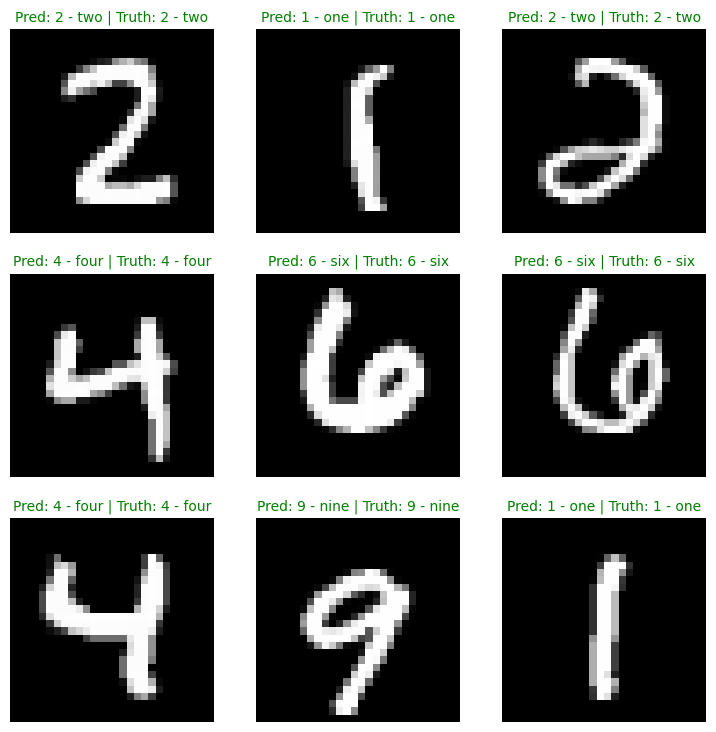

In [722]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, image in enumerate(sample_images):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(image.squeeze(), cmap="gray")

  pred_label = classes[sample_preds[i]]

  truth_label = classes[sample_labes[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

In [723]:
y_preds = []
model.to(device)
model.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

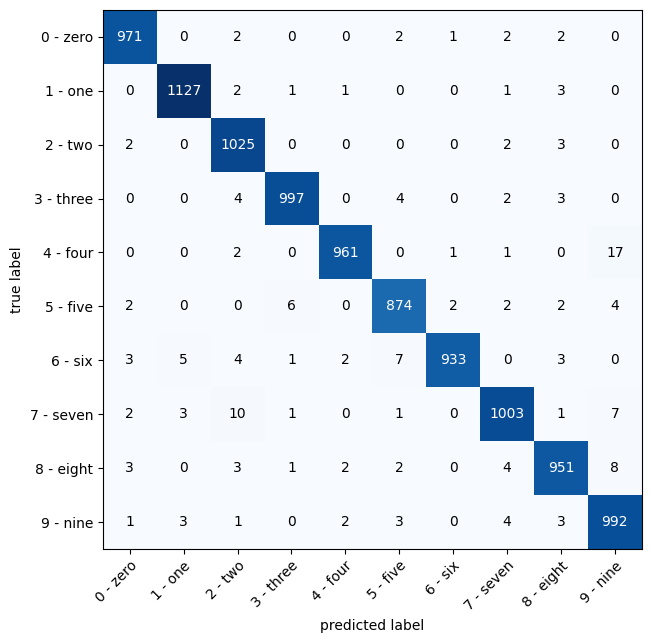

In [725]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=classes, 
    figsize=(10, 7)
);